In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string

In [14]:
sczbaseline = np.load('sczbaseline.npy')
spqbaseline = np.load('spqbaseline.npy')
sczres = np.load('sczres.npy')
spqres = np.load('spqres.npy')
altersczres = np.load('altersczres.npy')
alterspqres = np.load('alterspqres.npy')

In [3]:
## Calculate distance in cms. Speaker is positioned at 100cm from the hand. 
times = np.asarray([300,800,1500,2200,2700])
timesweep = np.arange(300,2800,100)
ts = timesweep/1000
v = 30 #cm/s 
a_distances = (120 - ts*v) # distance points in cm (network coordinates)
idx = [0,5,12,19,24]
distances = np.take(a_distances,idx)

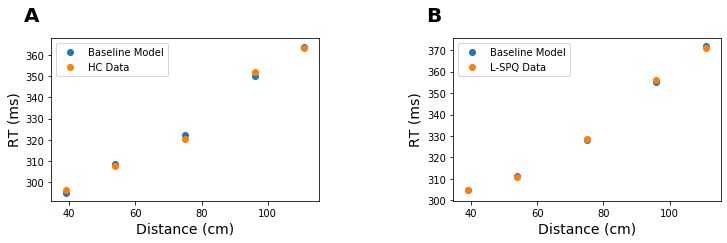

In [4]:
baselinefig, axs = plt.subplots(1, 2, figsize=(12,3));

ax1 = plt.subplot(121)
ax1.scatter(distances,sczbaseline[0],label = 'Baseline Model')
ax1.scatter(distances,sczbaseline[1],label = 'HC Data')
ax1.set_ylabel('RT (ms)',size=14)
ax1.set_xlabel('Distance (cm)',size=14)
#ax1.set_ylim([-0.04,-0.015])
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')
ax1.legend(loc = 'upper left', fontsize=10)

ax2 = plt.subplot(122)
ax2.scatter(distances,spqbaseline[0],label = 'Baseline Model')
ax2.scatter(distances,spqbaseline[1],label = 'L-SPQ Data')
ax2.set_ylabel('RT (ms)',size=14)
ax2.set_xlabel('Distance (cm)',size=14)
#ax2.set_ylim([-0.04,-0.015])
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')
ax2.legend(loc = 'upper left',fontsize=10)

baselinefig.subplots_adjust(wspace=.5)
baselinefig.savefig('Results/baselinefitting.png', bbox_inches='tight')

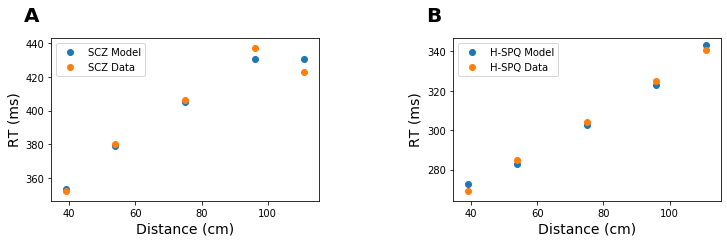

In [6]:
fitfig, axs = plt.subplots(1, 2, figsize=(12, 3));

ax1 = plt.subplot(121)
ax1.scatter(distances,sczres[0],label = 'SCZ Model')
ax1.scatter(distances,sczres[1],label = 'SCZ Data')
ax1.set_ylabel('RT (ms)',size=14)
ax1.set_xlabel('Distance (cm)',size=14)
#ax1.set_ylim([-0.05, -0.03])
ax1.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax1.transAxes, 
            size=20, weight='bold')
ax1.legend(fontsize=10)

ax2 = plt.subplot(122)
ax2.scatter(distances,spqres[0],label = 'H-SPQ Model')
ax2.scatter(distances,spqres[1],label = 'H-SPQ Data')
ax2.set_ylabel('RT (ms)',size=14)
ax2.set_xlabel('Distance (cm)',size=14)
#ax2.set_ylim([-0.05, -0.03])
ax2.text(-0.1, 1.1, string.ascii_uppercase[1], transform=ax2.transAxes, 
            size=20, weight='bold')
ax2.legend(loc = 'upper left',fontsize=10)

fitfig.subplots_adjust(wspace=.5)
fitfig.savefig('Results/fitting.png', bbox_inches='tight')

In [19]:
##https://psychology.stackexchange.com/questions/3187/how-to-adjust-sse-or-rmse-for-the-number-of-free-parameters-in-the-model
## https://stats.stackexchange.com/questions/230517/weighted-root-mean-square-error

def adjrmse(model,data,k):
    sse = np.sum(np.square(data-model))
    n = len(model)
    return np.sqrt(sse/(n-k))
    
scz_error = adjrmse(sczres[0],sczres[1],4)
spq_error = adjrmse(spqres[0],spqres[1],4)

alterscz_error = adjrmse(altersczres[0],altersczres[1],2)
alterspq_error = adjrmse(alterspqres[0],alterspqres[1],2)

print('Divisive normalisation')
print('SCZ: ',scz_error)
print('SPQ: ',spq_error)

print('Pruning and Bias')
print('SCZ: ',alterscz_error)
print('SPQ: ',alterspq_error)

Divisive normalisation
SCZ:  10.376189624584695
SPQ:  5.2729098476603005
Pruning and Bias
SCZ:  5.990695872916605
SPQ:  1.9751269438304537
